# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaidio

ERROR: Could not find a version that satisfies the requirement torchaidio (from versions: none)
ERROR: No matching distribution found for torchaidio


In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
!pip install selenium

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as expected_conditions
import time
import csv

In [6]:
import pandas as pd

In [7]:
import nltk

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [9]:
!pip install wordcloud

# 2. Instantiine Model

## bert model

In [10]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# 3. Encode and Calculate Sentiment

## bert model

In [11]:
tokens = tokenizer.encode('It was a Great Experience! I would definitely fly with Singapore Airlines again!', return_tensors='pt')

In [12]:
tokens

tensor([[  101, 10197, 10140,   143, 11838, 16277,   106,   151, 11008, 69923,
         27393, 19158, 10171, 19649, 17694, 12590,   106,   102]])

In [13]:
tokens[0]

tensor([  101, 10197, 10140,   143, 11838, 16277,   106,   151, 11008, 69923,
        27393, 19158, 10171, 19649, 17694, 12590,   106,   102])

In [14]:
tokenizer.decode(tokens[0])

'[CLS] it was a great experience! i would definitely fly with singapore airlines again! [SEP]'

In [15]:
result = model(tokens)

In [16]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[-2.1834, -2.2341, -0.8046,  1.4386,  2.9149]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [17]:
result.logits

tensor([[-2.1834, -2.2341, -0.8046,  1.4386,  2.9149]],
       grad_fn=<AddmmBackward0>)

In [18]:
int(torch.argmax(result.logits))+1

5

In [19]:
def bert_model(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1


## VADER MODEL

# 4. Collect Reviews

In [20]:
url = "https://www.tripadvisor.com/Airline_Review-d8729046-Reviews-Cathay-Pacific"

In [21]:
!apt-get update
!apt install chromium-chromedriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
zsh:1: command not found: apt-get
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable thi

/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_1261/2589910448.py:8: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [22]:
driver.get(url)

In [23]:
counter = 0

In [25]:
reviews_list = []
for i in range(0, 1000):
    reviews = driver.find_elements(By.XPATH, "(//q[@class='QewHA H4 _a']/span)") 
    for review in range(len(reviews)):
        reviews_list.append(reviews[review].text)  

    driver.find_element(By.XPATH, "//a[@class='ui_button nav next primary ']").click()
    counter+=1
    time.sleep(2)

driver.quit

WebDriverException: Message: disconnected: Unable to receive message from renderer
  (failed to check if window was closed: timeout: Timed out receiving message from renderer: 600.000)
  (Session info: headless chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x0000000100e04f38 chromedriver + 4910904
1   chromedriver                        0x0000000100d84a03 chromedriver + 4385283
2   chromedriver                        0x00000001009c9747 chromedriver + 472903
3   chromedriver                        0x00000001009b2427 chromedriver + 377895
4   chromedriver                        0x00000001009b20a0 chromedriver + 376992
5   chromedriver                        0x00000001009b07f2 chromedriver + 370674
6   chromedriver                        0x00000001009b0bb4 chromedriver + 371636
7   chromedriver                        0x00000001009af3d1 chromedriver + 365521
8   chromedriver                        0x00000001009c08d9 chromedriver + 436441
9   chromedriver                        0x00000001009aed16 chromedriver + 363798
10  chromedriver                        0x00000001009b1b46 chromedriver + 375622
11  chromedriver                        0x00000001009b07f2 chromedriver + 370674
12  chromedriver                        0x00000001009b0bb4 chromedriver + 371636
13  chromedriver                        0x00000001009af3d1 chromedriver + 365521
14  chromedriver                        0x00000001009b8260 chromedriver + 402016
15  chromedriver                        0x00000001009b82cc chromedriver + 402124
16  chromedriver                        0x00000001009aed16 chromedriver + 363798
17  chromedriver                        0x00000001009b1b46 chromedriver + 375622
18  chromedriver                        0x00000001009b07f2 chromedriver + 370674
19  chromedriver                        0x00000001009b0bb4 chromedriver + 371636
20  chromedriver                        0x00000001009af3d1 chromedriver + 365521
21  chromedriver                        0x00000001009bd010 chromedriver + 421904
22  chromedriver                        0x00000001009aed16 chromedriver + 363798
23  chromedriver                        0x00000001009b1b46 chromedriver + 375622
24  chromedriver                        0x00000001009b07f2 chromedriver + 370674
25  chromedriver                        0x00000001009b0bb4 chromedriver + 371636
26  chromedriver                        0x00000001009af3d1 chromedriver + 365521
27  chromedriver                        0x00000001009b88af chromedriver + 403631
28  chromedriver                        0x00000001009aed16 chromedriver + 363798
29  chromedriver                        0x00000001009b1b46 chromedriver + 375622
30  chromedriver                        0x00000001009b07f2 chromedriver + 370674
31  chromedriver                        0x00000001009b0bb4 chromedriver + 371636
32  chromedriver                        0x00000001009af3d1 chromedriver + 365521
33  chromedriver                        0x00000001009a7076 chromedriver + 331894
34  chromedriver                        0x00000001009aed16 chromedriver + 363798
35  chromedriver                        0x00000001009ae264 chromedriver + 361060
36  chromedriver                        0x00000001009ae390 chromedriver + 361360
37  chromedriver                        0x00000001009ae6b9 chromedriver + 362169
38  chromedriver                        0x00000001009ae66f chromedriver + 362095
39  chromedriver                        0x00000001009cb369 chromedriver + 480105
40  chromedriver                        0x0000000100a4e7b1 chromedriver + 1017777
41  chromedriver                        0x0000000100a33ee3 chromedriver + 909027
42  chromedriver                        0x00000001009fe30c chromedriver + 688908
43  chromedriver                        0x00000001009ff88e chromedriver + 694414
44  chromedriver                        0x0000000100dd21de chromedriver + 4702686
45  chromedriver                        0x0000000100dd6b19 chromedriver + 4721433
46  chromedriver                        0x0000000100dde28e chromedriver + 4752014
47  chromedriver                        0x0000000100dd791a chromedriver + 4725018
48  chromedriver                        0x0000000100dabb02 chromedriver + 4545282
49  chromedriver                        0x0000000100df6888 chromedriver + 4851848
50  chromedriver                        0x0000000100df6a05 chromedriver + 4852229
51  chromedriver                        0x0000000100e0ce5f chromedriver + 4943455
52  libsystem_pthread.dylib             0x00007ff803cb7259 _pthread_start + 125
53  libsystem_pthread.dylib             0x00007ff803cb2c7b thread_start + 15


In [26]:
counter

730

In [27]:
print(len(reviews_list))

3655


In [ ]:
# for i in range(0, counter+1):
#       driver.find_element(By.XPATH, "//a[@class='ui_button nav next primary ']").click()
#       time.sleep(2)

# for i in range(0, 1000-counter+1):
#     reviews = driver.find_elements(By.XPATH, "(//q[@class='QewHA H4 _a']/span)") 
#     for review in range(len(reviews)):
#         reviews_list.append(reviews[review].text)  

#     driver.find_element(By.XPATH, "//a[@class='ui_button nav next primary ']").click()
#     counter+=1
#     time.sleep(2)

# driver.quit

In [28]:
counter

730

In [29]:
print(len(reviews_list))

3655


# 5. Load Reviews into DataFrame and Score

In [30]:
reviews = pd.DataFrame(list(zip(reviews_list)), columns=['Review'])
reviews.head(5)

,Review
0,"Departed at time, good service on board, there..."
1,
2,"We booked 3 economy tickets for HK$52k, which ..."
3,
4,"To be fair, the flight itself is noting remark..."


In [31]:
reviews.tail(5)

,Review
3650,The food was so bad and no choice if you were ...
3651,I had a business trip to Hong Kong and was boo...
3652,My seat (14G) in Business Class didn't recline...
3653,It really was an absolutely painful trip... ca...
3654,First time we used this airline but we would n...


In [32]:
reviews['bert_score'] = reviews['Review'].apply(lambda x: bert_model(x))
reviews['vader_compound'] = reviews['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [33]:
reviews

,Review,bert_score,vader_compound
0,"Departed at time, good service on board, there...",3,0.9618
1,,4,0.0000
2,"We booked 3 economy tickets for HK$52k, which ...",1,0.0000
3,,4,0.0000
4,"To be fair, the flight itself is noting remark...",3,-0.3295
...,...,...,...
3650,The food was so bad and no choice if you were ...,1,-0.7699
3651,I had a business trip to Hong Kong and was boo...,5,0.8173
3652,My seat (14G) in Business Class didn't recline...,2,0.3291
3653,It really was an absolutely painful trip... ca...,1,-0.7645


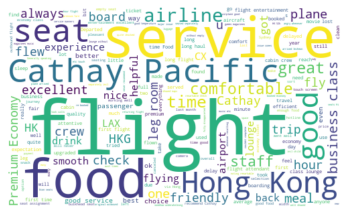

In [34]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in reviews['Review']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
def get_sentiment(compound):
    if compound < 0:
        return 'negative'
    elif compound == 0:
        return 'neutral'
    else:
        return 'positive'

In [36]:
reviews['sentiment'] = reviews['vader_compound'].apply(lambda x: get_sentiment(x))

In [37]:
reviews

,Review,bert_score,vader_compound,sentiment
0,"Departed at time, good service on board, there...",3,0.9618,positive
1,,4,0.0000,neutral
2,"We booked 3 economy tickets for HK$52k, which ...",1,0.0000,neutral
3,,4,0.0000,neutral
4,"To be fair, the flight itself is noting remark...",3,-0.3295,negative
...,...,...,...,...
3650,The food was so bad and no choice if you were ...,1,-0.7699,negative
3651,I had a business trip to Hong Kong and was boo...,5,0.8173,positive
3652,My seat (14G) in Business Class didn't recline...,2,0.3291,positive
3653,It really was an absolutely painful trip... ca...,1,-0.7645,negative


## bert sentiment

In [38]:
reviews['bert_score'].value_counts()

5    982
4    867
3    650
1    597
2    559
Name: bert_score, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

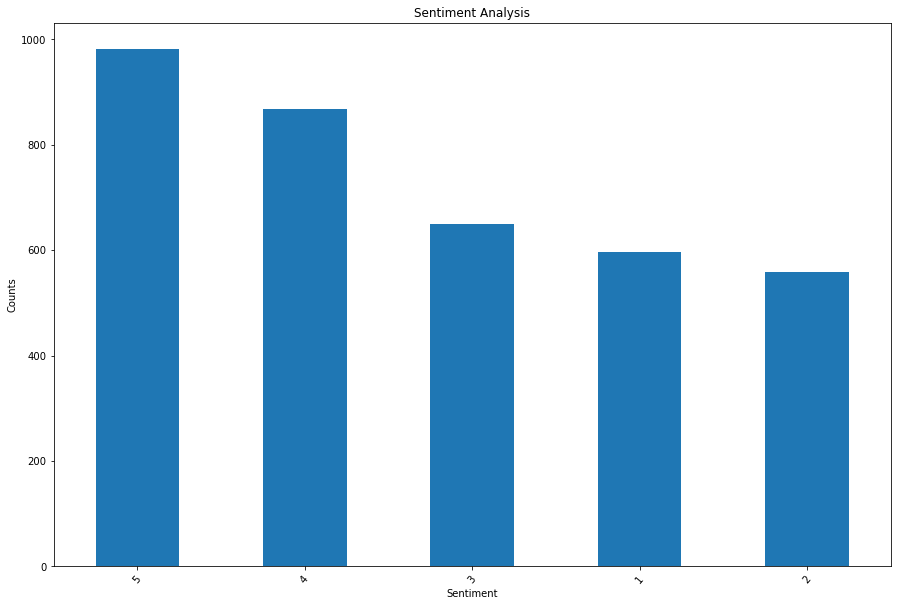

In [39]:
plt.figure(figsize=(15,10))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews['bert_score'].value_counts().plot.bar()
plt.xticks(rotation=50)
plt.show

Text(0.5, 0, 'Airlines Review Sentiment')

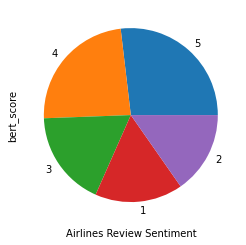

In [40]:
reviews.bert_score.value_counts().plot.pie()
plt.xlabel("Airlines Review Sentiment")

## vader sentiment

In [41]:
reviews['sentiment'].value_counts()

positive    2562
negative     891
neutral      202
Name: sentiment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

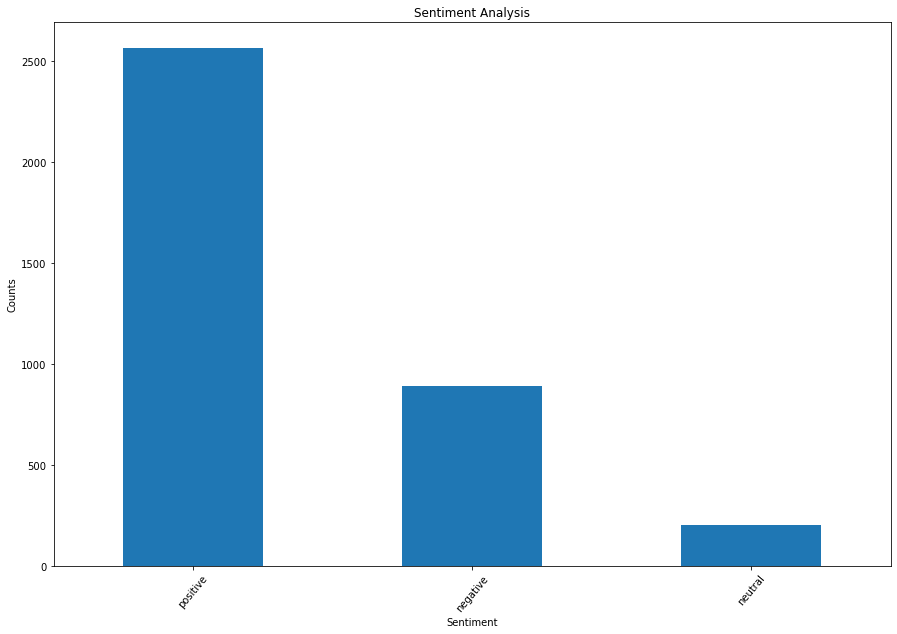

In [42]:
plt.figure(figsize=(15,10))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=50)
plt.show

Text(0.5, 0, 'Airlines Review Sentiment')

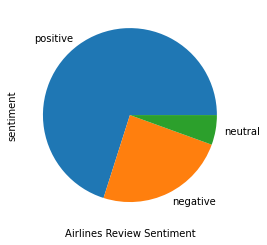

In [43]:
reviews.sentiment.value_counts().plot.pie()
plt.xlabel("Airlines Review Sentiment")

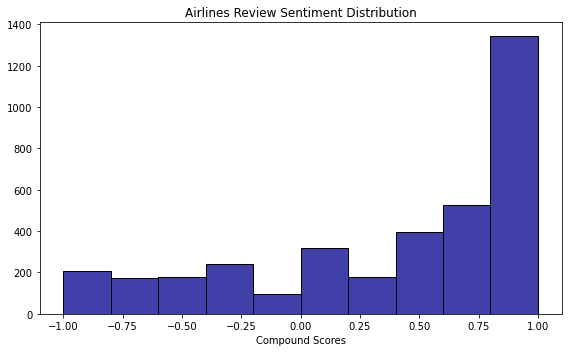

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(reviews, x='vader_compound', color="darkblue", bins=10, binrange=(-1,1))
plt.title("Airlines Review Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

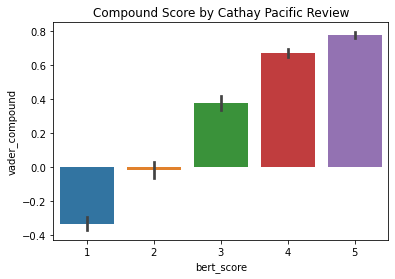

In [45]:
ax = sns.barplot(data=reviews, x='bert_score', y='vader_compound')
ax.set_title('Compound Score by Cathay Pacific Review')
plt.show()